# sovereign credit ratings

[sovereign ratings](https://countryeconomy.com/ratings)

“Sovereign credit rating, is an evaluation made by a credit rating agency and evaluates the credit worthiness of the issuer (country or government) of debt.”

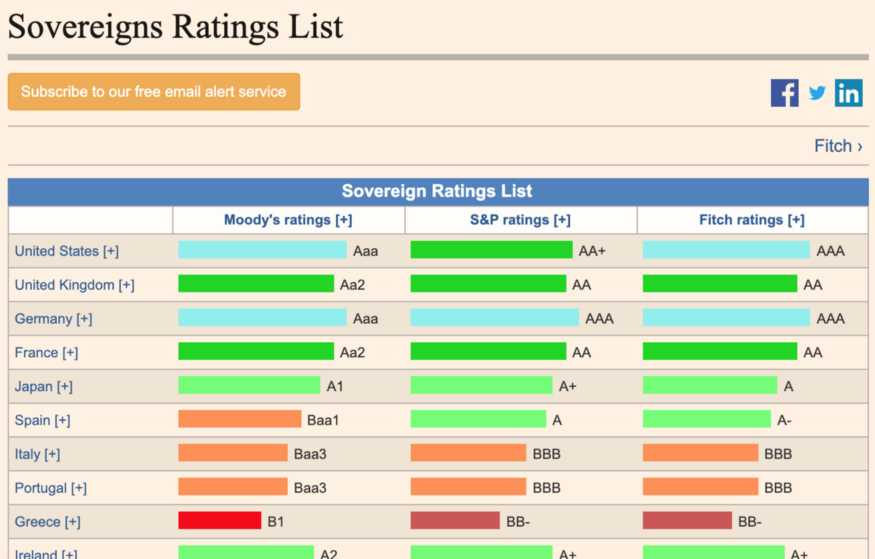

 BeautifulSoup is a Python library for pulling data out of HTML and XML files.The SoupStrainer allows you to choose which parts of an incoming document are parsed. Requests allow you to send HTTP/1.1 requests to access the response data, the website content in this case.

In [2]:
from bs4 import BeautifulSoup, SoupStrainer
import requests
import pandas as pd
url_countries = requests.get("https://countryeconomy.com/ratings").content
# We are only inetrestaed in the main table of homepage which contains the list of all the coutries.
parse_table = SoupStrainer(id="tb1T")
soup = BeautifulSoup(url_countries, 'lxml',parse_only=parse_table)
print(soup.prettify())

<!DOCTYPE html>
<table class="table tabledat table-striped table-condensed table-hover" id="tb1T">
 <thead>
  <tr class="tableheader">
   <th style=" width:19%;">
   </th>
   <th style=" width:27%;">
    <a href="/ratings/moodys">
     Moody's ratings [+]
    </a>
   </th>
   <th style=" width:27%;">
    <a href="/ratings/standardandpoors">
     S&amp;P ratings [+]
    </a>
   </th>
   <th style=" width:27%;">
    <a href="/ratings/fitch">
     Fitch ratings [+]
    </a>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a href="/ratings/usa">
     United States [+]
    </a>
   </td>
   <td>
    <span class="graph_hbar" style="background-color: #8DEEEE; width: 77%;">
    </span>
    <span class="padleft">
     Aaa
    </span>
   </td>
   <td>
    <span class="graph_hbar" style="background-color: #00D600; width: 74%;">
    </span>
    <span class="padleft">
     AA+
    </span>
   </td>
   <td>
    <span class="graph_hbar" style="background-color: #8DEEEE; width: 77%;">
    </span>

In [3]:
table = soup.find('tbody')

In [4]:

#In the table, each country is a link.
country_links=[]
for link in table('a'):
    #Get a clean country name and its link as a tuple.
    link = (link.get_text().replace('[+]','').strip(),link['href'])
    #Append to list of countries
    country_links.append(link)
print('Number of countries: ',len(country_links))
#Visualize first 5 countries in the list
country_links[:5]

Number of countries:  144


[('United States', '/ratings/usa'),
 ('United Kingdom', '/ratings/uk'),
 ('Germany', '/ratings/germany'),
 ('France', '/ratings/france'),
 ('Japan', '/ratings/japan')]

In [5]:
#Check for any invalid links
error_country=[]
for link in country_links:
    try:
        r = requests.get("https://countryeconomy.com"+link[1])
        r.raise_for_status()
    except requests.exceptions.HTTPError as err:
        error_country.append(link[0])
        print (err)
if len(error_country)==0:
    print('All links are working')

All links are working


In [6]:
#look thorugh the first country's page html
url = requests.get("https://countryeconomy.com"+country_links[0][1]).content
#Only interested in the table containing the data
parse_tables = SoupStrainer(id="myTabContent")
soup = BeautifulSoup(url, 'lxml',parse_only=parse_tables)
print(soup.prettify())

<!DOCTYPE html>
<div class="tab-content col-sm-12" id="myTabContent">
 <div class="tab-pane fade in active" id="moodys">
  <a id="MOODYS">
  </a>
  <div class="tabletit">
   Rating Moody's United States
  </div>
  <div class="table-responsive">
   <table class="table tabledat table-striped table-condensed table-hover" id="tb0_853">
    <thead>
     <tr class="tableheader">
      <th class="wborder" colspan="4">
       Long term Rating
      </th>
      <th class="wborder" colspan="4">
       Short term Rating
      </th>
     </tr>
     <tr class="tableheader">
      <th class="wborder" colspan="2">
       Foreign currency
      </th>
      <th class="wborder" colspan="2">
       Local currency
      </th>
      <th class="wborder" colspan="2">
       Foreign currency
      </th>
      <th class="wborder" colspan="2">
       Local currency
      </th>
     </tr>
     <tr class="tableheader">
      <th class="wborder">
       Date
      </th>
      <th class="wborder">
       Rating(Out

In [7]:

tables = soup.find_all('tbody')
print('Number of tables: ',len(tables))

Number of tables:  3


In [8]:
import time
#Instantiate a list that will contain all the scraped ratings.
ratings = []
#Labels of the three credit rating agencies
agencies= ['moodys','sp','fitch']
for link in country_links:
    time.sleep(1)
    url = requests.get("https://countryeconomy.com"+link[1]).content
    parse_tables = SoupStrainer(id="myTabContent")
    soup = BeautifulSoup(url, 'lxml',parse_only=parse_tables)
    tables = soup.find_all('tbody')
    #There are three tbody tags in each page, one for each of the credit agencies.
    for table, agency in zip(tables,agencies):
        #Print task-at-hand
        print(f'Scraping {link[0]} {agency} soverign credit ratings')
        for row in table('tr'):
            #Each row is a credit rating recieved
            #If the first cell of the row is empty then no long-term sovereign credit rating was given
            if not row('td')[0].get_text():
                continue
            date = row('td')[0].get_text(strip=True)
            #get ratings
            rating = row('td')[1].get_text().strip()
            #Add the rating to the list
            ratings.append([date,link[0],rating,agency])
    print(f'Web scraping for {link[0]} completed\n')
#Convert ratings list into pandas dataframe
ratings_df = pd.DataFrame(ratings, columns=['date','country','rating','agency'])
print('Ratings dataframe ready.')

Scraping United States moodys soverign credit ratings
Scraping United States sp soverign credit ratings
Scraping United States fitch soverign credit ratings
Web scraping for United States completed

Scraping United Kingdom moodys soverign credit ratings
Scraping United Kingdom sp soverign credit ratings
Scraping United Kingdom fitch soverign credit ratings
Web scraping for United Kingdom completed

Scraping Germany moodys soverign credit ratings
Scraping Germany sp soverign credit ratings
Scraping Germany fitch soverign credit ratings
Web scraping for Germany completed

Scraping France moodys soverign credit ratings
Scraping France sp soverign credit ratings
Scraping France fitch soverign credit ratings
Web scraping for France completed

Scraping Japan moodys soverign credit ratings
Scraping Japan sp soverign credit ratings
Scraping Japan fitch soverign credit ratings
Web scraping for Japan completed

Scraping Spain moodys soverign credit ratings
Scraping Spain sp soverign credit ratin

In [9]:
#ratings_df.to_csv('data/country_ratings.csv', index=False)
ratings_df.head(10)

,date,country,rating,agency
0,2020-06-19,United States,Aaa (Stable),moodys
1,2018-04-25,United States,Aaa (Stable),moodys
2,2013-07-18,United States,Aaa (Stable),moodys
3,2011-08-02,United States,Aaa (Negative),moodys
4,2011-07-13,United States,(Under Review),moodys
5,2003-11-15,United States,(Stable),moodys
6,1949-02-05,United States,Aaa,moodys
7,2013-06-10,United States,(Stable),sp
8,2011-08-05,United States,AA+ (Negative),sp
9,2020-03-26,United States,AAA,fitch


In [10]:
ratings_df.shape

(6619, 4)

In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6619 entries, 0 to 6618
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     6619 non-null   object
 1   country  6619 non-null   object
 2   rating   6619 non-null   object
 3   agency   6619 non-null   object
dtypes: object(4)
memory usage: 207.0+ KB


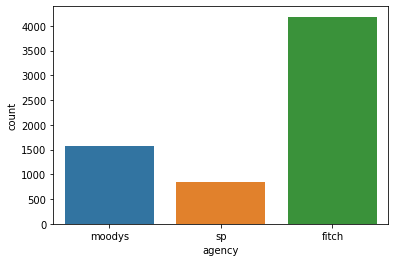

In [12]:
import seaborn as sns

sns.countplot(data = ratings_df, x='agency')